<a href="https://colab.research.google.com/github/arunmozhidevan/Kaggle/blob/main/Diabetic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset & Module Imports

In [1]:
import json
!pip install opendatasets
import opendatasets
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
!cp "drive/MyDrive/Auth/kaggle.json" "kaggle.json"
keyfile = json.load(open('kaggle.json'))
opendatasets.download('https://www.kaggle.com/smit1212/diabetic-data-cleaning')

Mounted at /content/drive


100%|██████████| 3.16M/3.16M [00:00<00:00, 133MB/s]

# Importing dataset

In [2]:
data = pd.read_csv('/content/diabetic-data-cleaning/diabetic_data.csv', na_values = '?')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [4]:
f'Rows:{data.shape[0]}, Columns:{data.shape[1]}'

'Rows:101766, Columns:50'

# Vizualization

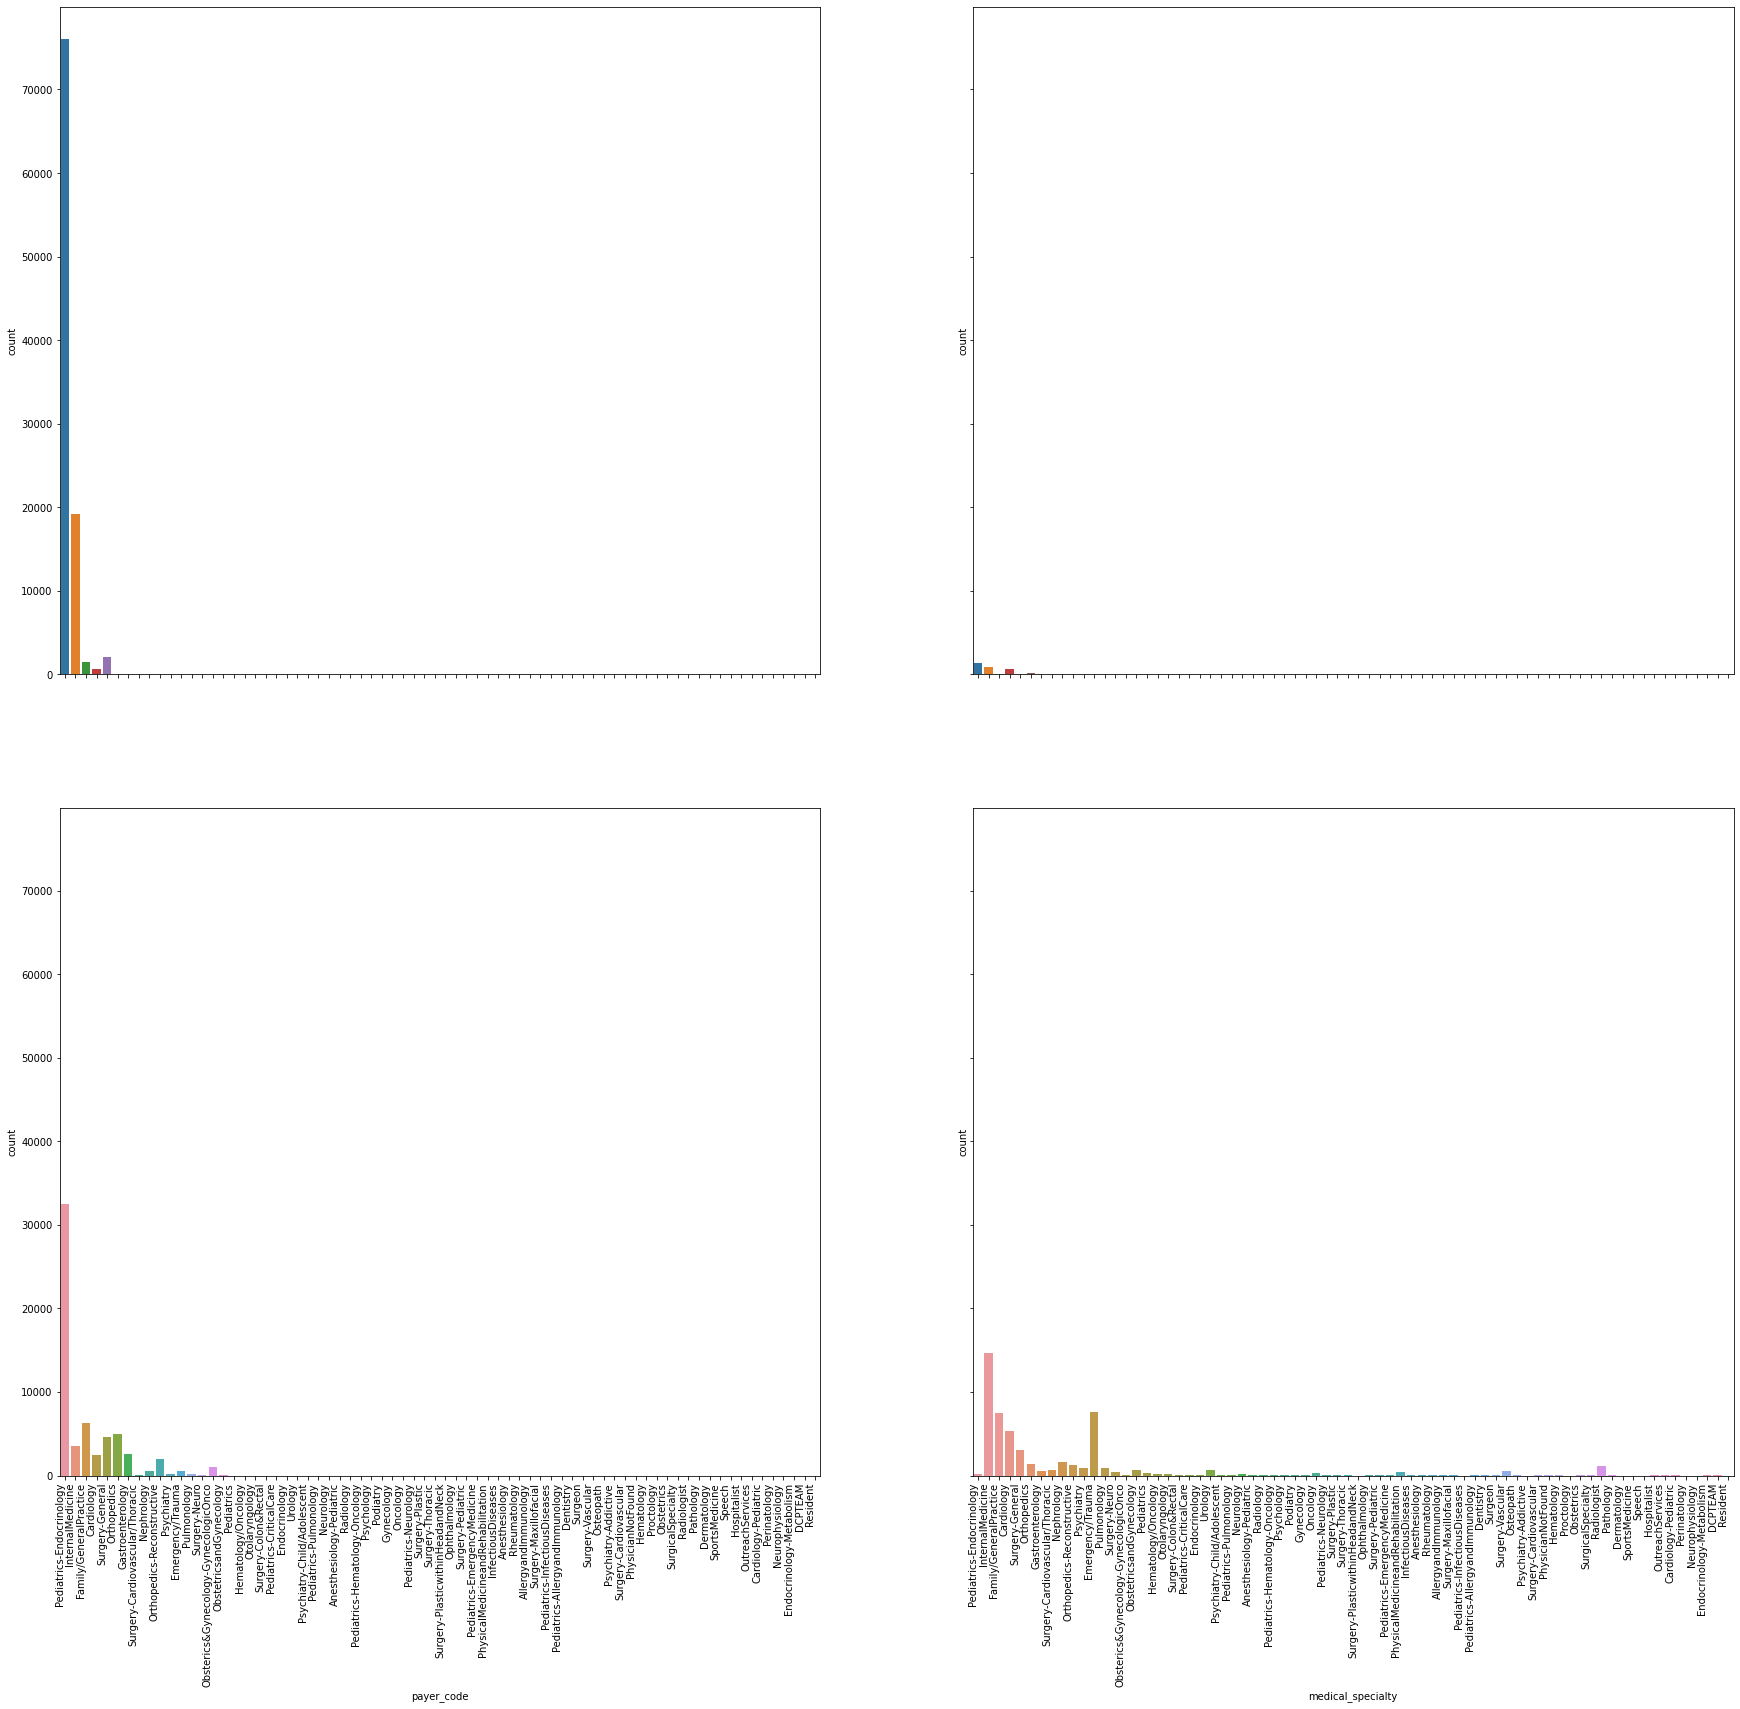

In [5]:
f, ax = plt.subplots(2,2,sharex=True, sharey=True,figsize=(30,30))
ax = ax.ravel()
[sns.countplot(x=value,data=data, orient='v', ax=ax[key]) for key,value in enumerate(['race', 'weight', 'payer_code','medical_specialty'])]
f.autofmt_xdate(rotation=90)

# Check NA

In [6]:
NA_data = []
NA_attribute = []
length = data.shape[0]
for x,y in zip(data.columns,data.isna().sum()):
  NA_attribute.append(x)
  NA_data.append(round(y*100/length,2))
pd.DataFrame(NA_data,index=NA_attribute)

,0
encounter_id,0.00
patient_nbr,0.00
race,2.23
gender,0.00
age,0.00
weight,96.86
admission_type_id,0.00
discharge_disposition_id,0.00
admission_source_id,0.00
time_in_hospital,0.00


replacing 'race' nan values to other

In [7]:
data['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [8]:
data['race'] = data['race'].fillna('Other')

In [9]:
len(data[data['gender'] != 'Unknown/Invalid'])

101763

'Unknown/Invalid' have only 3 datas so we're removing

In [10]:
data = data[data['gender'] != 'Unknown/Invalid']

Dropping records with null valuse

In [11]:
data = data[~data['diag_1'].isna()]
data = data[~data['diag_2'].isna()]
data = data[~data['diag_3'].isna()]

Dropping features with large number of missing values or one unique value

In [12]:
data.drop(['weight','payer_code','medical_specialty','examide', 'citoglipton', 'glimepiride-pioglitazone'], axis = 1)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,Down,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,Steady,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,Down,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,Up,No,No,No,No,Ch,Yes,NO


In [13]:
for i in data.columns:
  if data[i].dtypes == object:
    print(f'{i}: {data[i].unique()}\n')

race: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']

gender: ['Female' 'Male']

age: ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']

weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty: [nan 'InternalMedicine' 'Family/GeneralPractice' 'Cardiology'
 'Surgery-General' 'Orthopedics' 'Gastroenterology'
 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Pediatrics-Endocrinology' 'Surgery-Colon&Rectal'
 'Endocrinology' 'Urology' 'Pediatrics-CriticalCare'
 'Psychiatry-Child/Adolescent' 'Pediatrics-Pulmonology' 'Neurology'
 'Anesthesiology-P

we are going to assign label encode for these binary and multiclass attribute first

In [14]:
attr = ['race', 'gender', 'age', 'acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_1', 'diag_2', 'diag_3']

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
for i in attr:
  data[i] = le.fit_transform(data[i])

In [17]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,2,0,1,NaN,1,1,7,3,...,0,Up,No,0,0,0,0,0,1,>30
2,64410,86047875,0,0,2,NaN,1,1,7,2,...,0,No,No,0,0,0,0,1,1,NO
3,500364,82442376,2,1,3,NaN,1,1,7,2,...,0,Up,No,0,0,0,0,0,1,NO
4,16680,42519267,2,1,4,NaN,1,1,7,1,...,0,Steady,No,0,0,0,0,0,1,NO
5,35754,82637451,2,1,5,NaN,2,1,2,3,...,0,Steady,No,0,0,0,0,1,1,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,NaN,1,3,7,3,...,0,Down,No,0,0,0,0,0,1,>30
101762,443847782,74694222,0,0,8,NaN,1,4,5,5,...,0,Steady,No,0,0,0,0,1,1,NO
101763,443854148,41088789,2,1,7,NaN,1,1,7,1,...,0,Down,No,0,0,0,0,0,1,NO
101764,443857166,31693671,2,0,8,NaN,2,3,7,10,...,0,Up,No,0,0,0,0,0,1,NO


we are assigning values for some set of attributes<br>
* 'No' <- 0
* 'Steady' <- 1
* 'Down' <- 1
* 'Up' <- 1

In [18]:
temp_attr = [
            'metformin', 
            'repaglinide', 
            'nateglinide', 
            'chlorpropamide', 
            'glimepiride', 
            'glipizide', 
            'glyburide', 
            'pioglitazone', 
            'rosiglitazone', 
            'acarbose', 
            'miglitol', 
            'insulin', 
            'glyburide-metformin']

for i in temp_attr:
    data[i] = data[i].replace('No', 0)
    data[i] = data[i].replace('Steady', 1)
    data[i] = data[i].replace('Up', 1)
    data[i] = data[i].replace('Down', 1)

In [19]:
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 2)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 2)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', 0)

In [20]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 2)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 2)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 1)
data['A1Cresult'] = data['A1Cresult'].replace('None', 0)

In [21]:
data['readmitted'] = data['readmitted'].replace('>30', 1)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [22]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,2,0,1,NaN,1,1,7,3,...,0,1,0,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,NaN,1,1,7,2,...,0,0,0,0,0,0,0,1,1,0
3,500364,82442376,2,1,3,NaN,1,1,7,2,...,0,1,0,0,0,0,0,0,1,0
4,16680,42519267,2,1,4,NaN,1,1,7,1,...,0,1,0,0,0,0,0,0,1,0
5,35754,82637451,2,1,5,NaN,2,1,2,3,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,NaN,1,3,7,3,...,0,1,0,0,0,0,0,0,1,1
101762,443847782,74694222,0,0,8,NaN,1,4,5,5,...,0,1,0,0,0,0,0,1,1,0
101763,443854148,41088789,2,1,7,NaN,1,1,7,1,...,0,1,0,0,0,0,0,0,1,0
101764,443857166,31693671,2,0,8,NaN,2,3,7,10,...,0,1,0,0,0,0,0,0,1,0


# Part A - removing columns -> weight, payer_code, medical_specialty

In [23]:
data.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

In [24]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,2,0,1,1,1,7,3,59,...,0,1,0,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,1,1,7,2,11,...,0,0,0,0,0,0,0,1,1,0
3,500364,82442376,2,1,3,1,1,7,2,44,...,0,1,0,0,0,0,0,0,1,0
4,16680,42519267,2,1,4,1,1,7,1,51,...,0,1,0,0,0,0,0,0,1,0
5,35754,82637451,2,1,5,2,1,2,3,31,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,1,3,7,3,51,...,0,1,0,0,0,0,0,0,1,1
101762,443847782,74694222,0,0,8,1,4,5,5,33,...,0,1,0,0,0,0,0,1,1,0
101763,443854148,41088789,2,1,7,1,1,7,1,53,...,0,1,0,0,0,0,0,0,1,0
101764,443857166,31693671,2,0,8,2,3,7,10,45,...,0,1,0,0,0,0,0,0,1,0


# train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
data.iloc[:,:-1]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,149190,55629189,2,0,1,1,1,7,3,59,...,0,0,1,0,0,0,0,0,0,1
2,64410,86047875,0,0,2,1,1,7,2,11,...,0,0,0,0,0,0,0,0,1,1
3,500364,82442376,2,1,3,1,1,7,2,44,...,0,0,1,0,0,0,0,0,0,1
4,16680,42519267,2,1,4,1,1,7,1,51,...,0,0,1,0,0,0,0,0,0,1
5,35754,82637451,2,1,5,2,1,2,3,31,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,1,3,7,3,51,...,0,0,1,0,0,0,0,0,0,1
101762,443847782,74694222,0,0,8,1,4,5,5,33,...,0,0,1,0,0,0,0,0,1,1
101763,443854148,41088789,2,1,7,1,1,7,1,53,...,0,0,1,0,0,0,0,0,0,1
101764,443857166,31693671,2,0,8,2,3,7,10,45,...,0,0,1,0,0,0,0,0,0,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.33, random_state=42)

# model creation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model_list = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
clfs = []
clfs.append(LogisticRegression())
# clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
for name,model in zip(model_list, clfs):
  model.fit(X_train, y_train)
  print(f'{name}: {round(accuracy_score(model.predict(X_test), y_test)*100, 2)}%\n')

LogisticRegression: 56.87%

KNeighborsClassifier: 55.57%

DecisionTreeClassifier: 57.63%

RandomForestClassifier: 66.24%

GradientBoostingClassifier: 66.19%

